# Dirichlet Process Mixture Model for the TUMKitchen Dataset

This script aims to perform action segmentation in an online manner. The DPMM method provides a nice way to learn clusters incrementally and therefore we would like to train DPMM online with the following features: **jointLocs**, **relativeAngle** and **quaternions**. 

In [1]:
import bnpy
import numpy as np
import os
import time

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def plot_segmentation(labels):
    plt.plot(labels)
    plt.show()
    

-- processing: TUMkitchen_rightArm_quaternion_v1
--- read data
--- train DPMM
--- output results


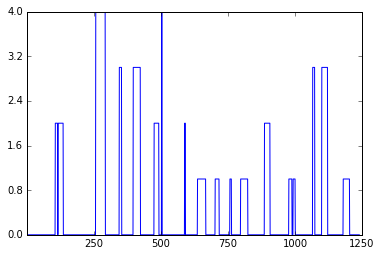

-- processing: TUMkitchen_rightArm_quaternion_v2
--- read data
--- train DPMM
--- output results


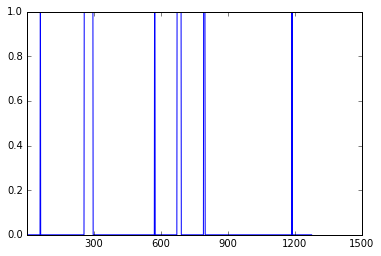

-- processing: TUMkitchen_rightArm_quaternion_v3
--- read data
--- train DPMM
--- output results


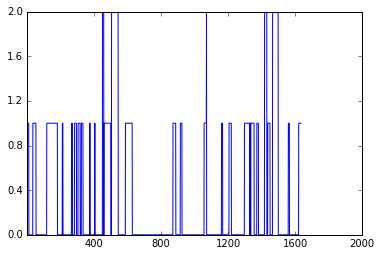

-- processing: TUMkitchen_rightArm_quaternion_v4
--- read data
--- train DPMM
--- output results


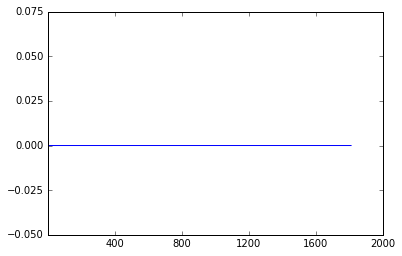

-- processing: TUMkitchen_rightArm_quaternion_v5
--- read data
--- train DPMM
--- output results


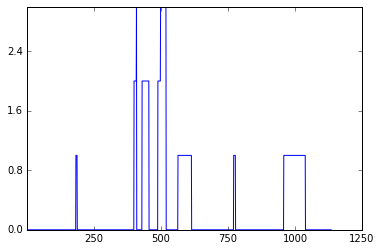

-- processing: TUMkitchen_rightArm_quaternion_v6
--- read data
--- train DPMM
--- output results


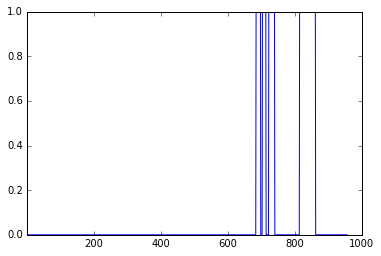

-- processing: TUMkitchen_rightArm_quaternion_v7
--- read data
--- train DPMM
--- output results


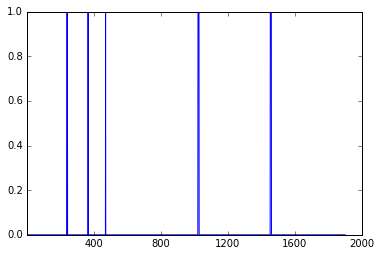

-- processing: TUMkitchen_rightArm_quaternion_v8
--- read data
--- train DPMM
--- output results


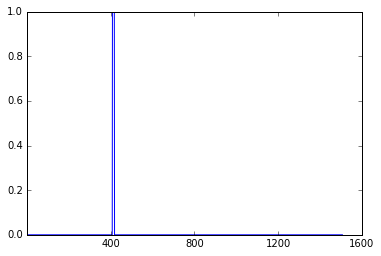

-- processing: TUMkitchen_rightArm_quaternion_v9
--- read data
--- train DPMM
--- output results


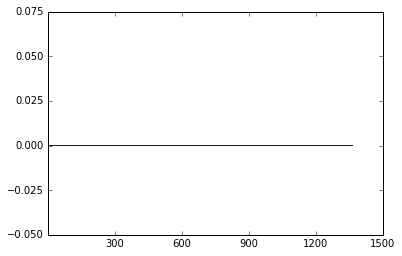

-- processing: TUMkitchen_rightArm_quaternion_v10
--- read data
--- train DPMM
--- output results


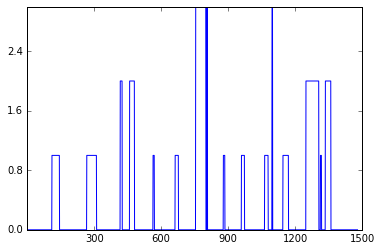

-- processing: TUMkitchen_rightArm_quaternion_v11
--- read data
--- train DPMM
--- output results


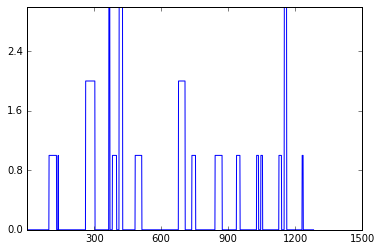

-- processing: TUMkitchen_rightArm_quaternion_v12
--- read data
--- train DPMM
--- output results


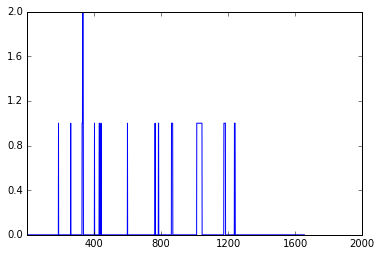

-- processing: TUMkitchen_rightArm_quaternion_v13
--- read data
--- train DPMM
--- output results


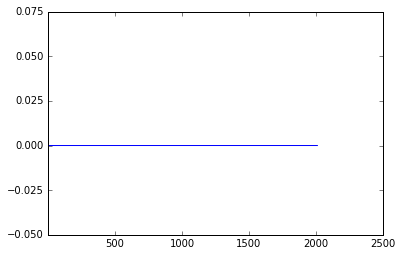

-- processing: TUMkitchen_rightArm_quaternion_v14
--- read data
--- train DPMM
--- output results


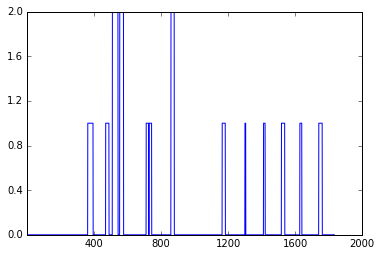

-- processing: TUMkitchen_rightArm_quaternion_v15
--- read data
--- train DPMM
--- output results


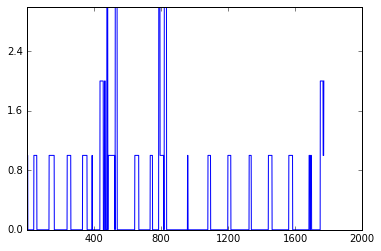

-- processing: TUMkitchen_rightArm_quaternion_v16
--- read data
--- train DPMM
--- output results


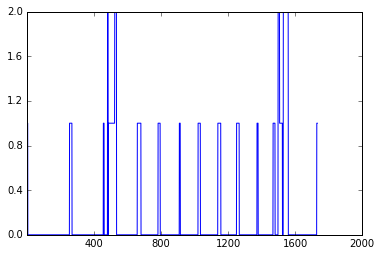

-- processing: TUMkitchen_rightArm_quaternion_v17
--- read data
--- train DPMM
--- output results


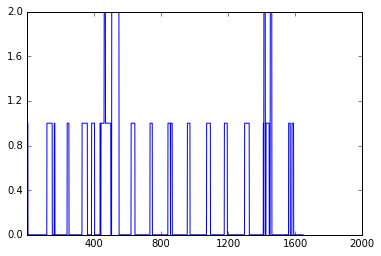

-- processing: TUMkitchen_rightArm_quaternion_v18
--- read data
--- train DPMM
--- output results


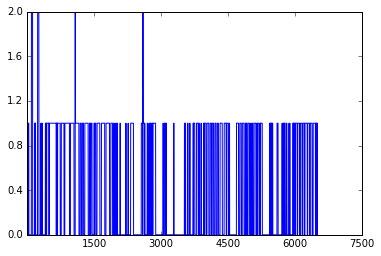

-- processing: TUMkitchen_rightArm_quaternion_v19
--- read data
--- train DPMM
--- output results


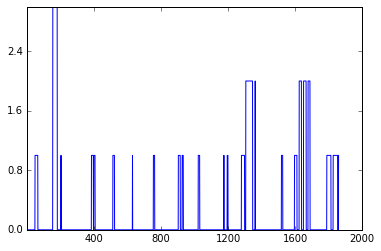

quaternion:mean(runtime)=4.14795988484
-- processing: TUMkitchen_leftArm_quaternion_v1
--- read data
--- train DPMM
--- output results


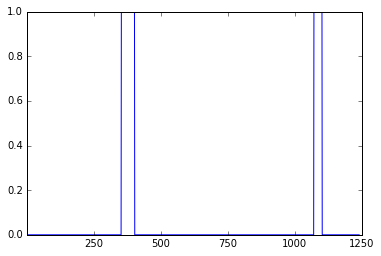

-- processing: TUMkitchen_leftArm_quaternion_v2
--- read data
--- train DPMM
--- output results


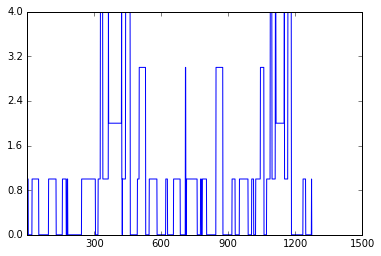

-- processing: TUMkitchen_leftArm_quaternion_v3
--- read data
--- train DPMM
--- output results


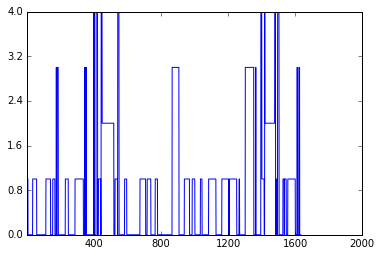

-- processing: TUMkitchen_leftArm_quaternion_v4
--- read data
--- train DPMM
--- output results


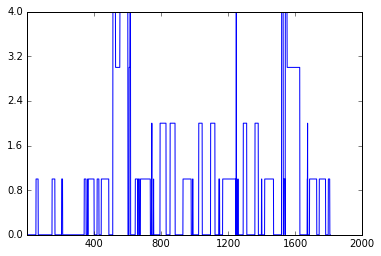

-- processing: TUMkitchen_leftArm_quaternion_v5
--- read data
--- train DPMM
--- output results


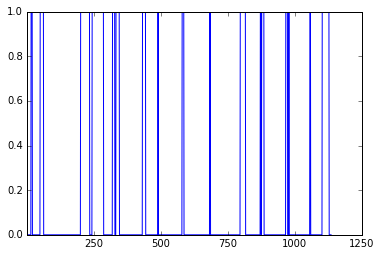

-- processing: TUMkitchen_leftArm_quaternion_v6
--- read data
--- train DPMM
--- output results


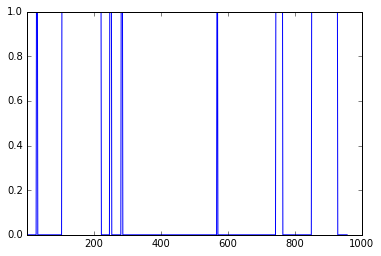

-- processing: TUMkitchen_leftArm_quaternion_v7
--- read data
--- train DPMM
--- output results


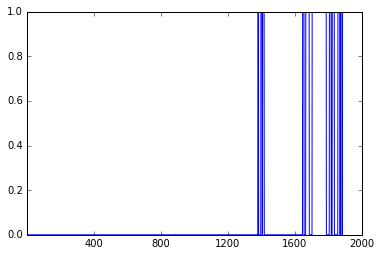

-- processing: TUMkitchen_leftArm_quaternion_v8
--- read data
--- train DPMM
--- output results


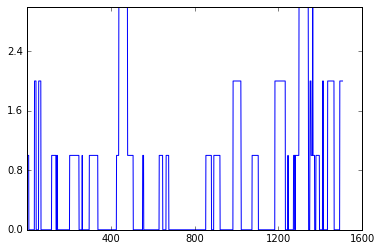

-- processing: TUMkitchen_leftArm_quaternion_v9
--- read data
--- train DPMM
--- output results


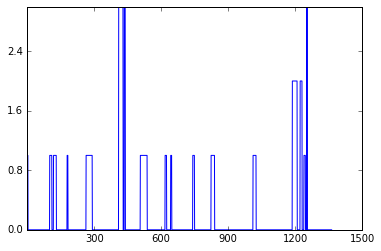

-- processing: TUMkitchen_leftArm_quaternion_v10
--- read data
--- train DPMM
--- output results


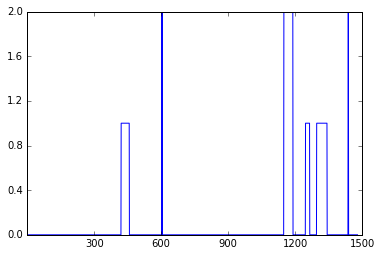

-- processing: TUMkitchen_leftArm_quaternion_v11
--- read data
--- train DPMM
--- output results


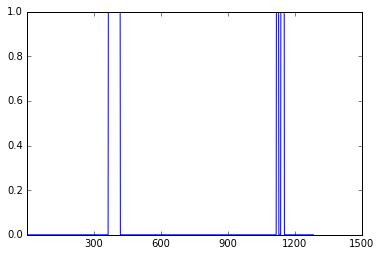

-- processing: TUMkitchen_leftArm_quaternion_v12
--- read data
--- train DPMM
--- output results


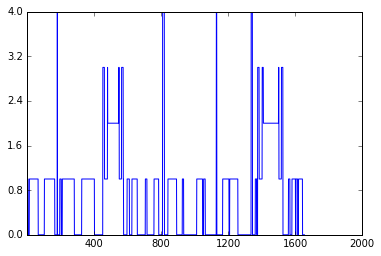

-- processing: TUMkitchen_leftArm_quaternion_v13
--- read data
--- train DPMM
--- output results


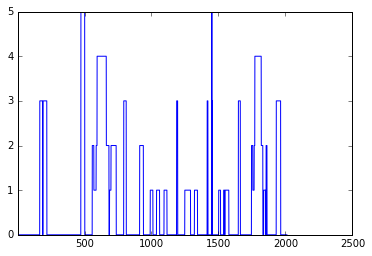

-- processing: TUMkitchen_leftArm_quaternion_v14
--- read data
--- train DPMM
--- output results


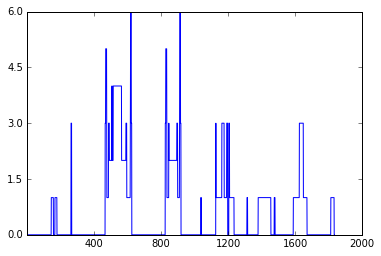

-- processing: TUMkitchen_leftArm_quaternion_v15
--- read data
--- train DPMM
--- output results


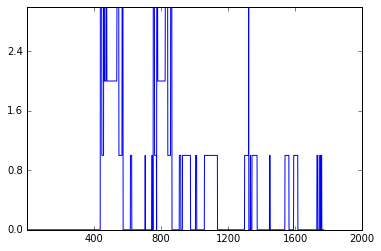

-- processing: TUMkitchen_leftArm_quaternion_v16
--- read data
--- train DPMM
--- output results


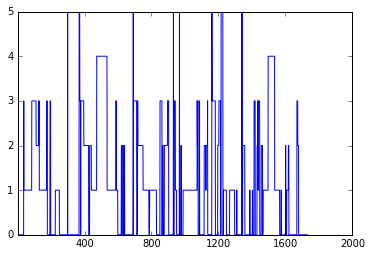

-- processing: TUMkitchen_leftArm_quaternion_v17
--- read data
--- train DPMM
--- output results


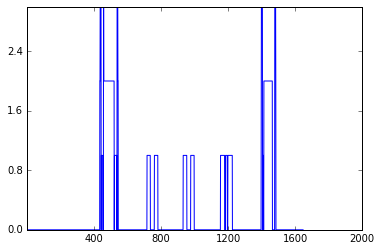

-- processing: TUMkitchen_leftArm_quaternion_v18
--- read data
--- train DPMM
--- output results


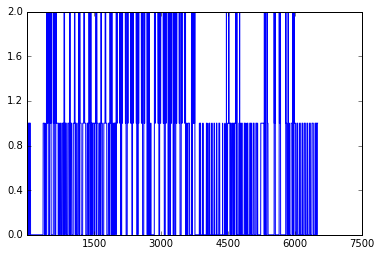

-- processing: TUMkitchen_leftArm_quaternion_v19
--- read data
--- train DPMM
--- output results


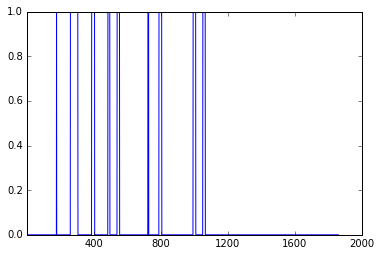

quaternion:mean(runtime)=5.59857317021


In [45]:
# feature_list = ['jointLocs','relativeAngle','quaternion']
feature_list = ['quaternion']
bodypart_list = ['rightArm','leftArm','torso']
dataset_path = '/mnt/hdd/Dataset_TUMKitchen/features'
result_path = '/mnt/hdd/Dataset_TUMKitchen/DPMM_segmentation_results'
bodypart_list = ['rightArm','leftArm']


for feature_type in feature_list:
    for bodypart_type in bodypart_list:
        cpt_time = []
        for seq in range(19):
            print '-- processing: TUMkitchen_{:s}_{:s}_v{:d}'.format(bodypart_type,feature_type, seq+1)

            ## read the features from the file
            filename = 'TUMkitchen_{:s}_{:s}_v{:d}.mat'.format(bodypart_type,feature_type, seq+1)
            print '--- read data'
            dataset = bnpy.data.XData.read_mat(os.path.join(dataset_path, filename))

            ## train DPMM using online algorithm
            print '--- train DPMM'
            time_start = time.time()
            K1_trained_model, K1_info_dict = bnpy.run(
            dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
            output_path='/tmp/CUMMAD_DPMM/trymoves-K=1/',
            doWriteStdOut=False,
            nLap=30, nTask=1, nBatch=10,
#             gamma0=1e3, 
            sF=5e-3, ECovMat='eye',
            K=1, initname='randexamples',
            moves='birth,merge,shuffle',
            m_startLap=5, b_startLap=2, b_Kfresh=4)

            ## measure running time
            eps = time.time()-time_start
            cpt_time = np.append(cpt_time, eps)

            ## assign labels to samples (0-based cluster)
            print '--- output results'
            Q = K1_trained_model.calc_local_params(dataset)['E_log_soft_ev'] # time X dimension, matrix of encoded features
            sample_labels = np.argmax(Q, axis=1)
            plot_segmentation(sample_labels)

            ## save the sample labels to file
            outfile = 'TUMkitchen_{:s}_{:s}_v{:d}_DPMM_SampleLabels.txt'.format(bodypart_type,feature_type, seq+1)
            np.savetxt(os.path.join(result_path, outfile), sample_labels)

            ## save the encoded features to file
            outfile2 = 'TUMkitchen_{:s}_{:s}_v{:d}_DPMM_SampleEncoding.txt'.format(bodypart_type,feature_type, seq+1)
            np.savetxt(os.path.join(result_path, outfile2), Q)
            
        print feature_type+':mean(runtime)=' + str(np.mean(cpt_time))